In [26]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches
import pathlib

import sys
sys.path.append("..")  # Adiciona a pasta anterior ao path
import micromag as mg

In [27]:
fig_dir = pathlib.Path("../..") / "paper" / "figures"

In [28]:
def angular_distance(vec_a, vec_b):
    # Produto escalar entre os vetores
    dot_product = np.dot(vec_a, vec_b)
    
    # Magnitudes dos vetores
    magnitude_a = np.linalg.norm(vec_a)
    magnitude_b = np.linalg.norm(vec_b)
    
    # Cálculo do cosseno do ângulo
    cos_theta = dot_product / (magnitude_a * magnitude_b)
    
    # Ângulo em radianos
    theta = np.rad2deg(np.arccos(cos_theta))
    # theta = np.arccos(np.clip(cos_theta, -1.0, 1.0))# Clipping para evitar erros numéricos
    return theta

In [29]:
r2 =  0.9

In [31]:
# Pasta onde os arquivos CSV estão localizados
csv_folder = "csv_files_real_data"
# Listas para armazenar os momentos dipolares
mx_all_standard, my_all_standard, mz_all_standard = [], [], []
mx_all_iterative, my_all_iterative, mz_all_iterative = [], [], []

# Listas para armazenar os valores de R²
r2_all_standard, r2_all_iterative = [], []

# Processar os arquivos da pasta
for file in os.listdir(csv_folder):
    if file.endswith("_standard.csv"):
        # Ler os arquivos padrão
        df_standard = pd.read_csv(os.path.join(csv_folder, file))
        mx_all_standard.extend(df_standard['mx_standard'].values)
        my_all_standard.extend(df_standard['my_standard'].values)
        mz_all_standard.extend(df_standard['mz_standard'].values)
        r2_all_standard.extend(df_standard['r_2_standard'].values)

    elif file.endswith("_iterative.csv"):
        # Ler os arquivos iterativos
        df_iterative = pd.read_csv(os.path.join(csv_folder, file))
        mx_all_iterative.extend(df_iterative['mx_iterative'].values)
        my_all_iterative.extend(df_iterative['my_iterative'].values)
        mz_all_iterative.extend(df_iterative['mz_iterative'].values)
        r2_all_iterative.extend(df_iterative['r_2_iterative'].values)

# Criar as listas com as soluções finais para os momentos dipolares
dipole_moment_standard = np.array([
    np.array(mx_all_standard), 
    np.array(my_all_standard), 
    np.array(mz_all_standard)
]).T

dipole_moment_iterative = np.array([
    np.array(mx_all_iterative), 
    np.array(my_all_iterative), 
    np.array(mz_all_iterative)
]).T

# Criar arrays para os valores de R²
r2_standard = np.array(r2_all_standard)
r2_iterative = np.array(r2_all_iterative)


In [32]:
# indices_standard = np.random.permutation(dipole_moment_standard.shape[0])
# indices_iterative = np.random.permutation(dipole_moment_iterative.shape[0])

indices_standard = np.argsort(r2_standard)[::-1]
indices_iterative = np.argsort(r2_iterative)[::-1]

r2_iterative[indices_iterative]

array([ 0.99907287,  0.99905445,  0.99902849, ..., -0.74859298,
       -1.02620841, -1.56265381])

In [33]:
dipole_moment_standard = dipole_moment_standard[indices_standard]
dipole_moment_iterative = dipole_moment_iterative[indices_iterative]
r2_standard = r2_standard[indices_standard]
r2_iterative = r2_iterative[indices_iterative]

In [34]:
inc_standard, dec_standard = [], []
inc_iterative, dec_iterative = [], []

for n in range(2, len(dipole_moment_standard[:, 0])):
    vector_sum = np.sum(dipole_moment_standard[:n, :], axis=0)
    inc, dec, _ = mg.vector_to_angles(vector_sum)
    inc_standard.append(inc)
    dec_standard.append(dec)

for n in range(2, len(dipole_moment_iterative[:, 0])):
    vector_sum = np.sum(dipole_moment_iterative[:n, :], axis=0)
    inc, dec, _ = mg.vector_to_angles(vector_sum)
    inc_iterative.append(inc)
    dec_iterative.append(dec)

In [35]:
filtered_standard = dipole_moment_standard[r2_standard >= r2]
filtered_iterative = dipole_moment_iterative[r2_iterative >= r2]

inc_standard, dec_standard = [], []
inc_iterative, dec_iterative = [], []
inc_standard_filtered, dec_standard_filtered = [], []
inc_iterative_filtered, dec_iterative_filtered = [], []

vector_sum_standard, vector_sum_iterative = [], []
vector_sum_standard_filtered, vector_sum_iterative_filtered = [], []

for n in range(2, len(dipole_moment_standard[:, 0])):
    vector_sum = np.sum(dipole_moment_standard[:n, :], axis=0)
    vector_sum_standard.append(vector_sum)  # Armazenar vetor somado
    inc, dec, _ = mg.vector_to_angles(vector_sum)
    inc_standard.append(inc)
    dec_standard.append(dec)

for n in range(2, len(dipole_moment_iterative[:, 0])):
    vector_sum = np.sum(dipole_moment_iterative[:n, :], axis=0)
    vector_sum_iterative.append(vector_sum)  # Armazenar vetor somado
    inc, dec, _ = mg.vector_to_angles(vector_sum)
    inc_iterative.append(inc)
    dec_iterative.append(dec)

for n in range(2, len(filtered_standard[:, 0])):
    vector_sum = np.sum(filtered_standard[:n, :], axis=0)
    vector_sum_standard_filtered.append(vector_sum)  # Armazenar vetor somado
    inc, dec, _ = mg.vector_to_angles(vector_sum)
    inc_standard_filtered.append(inc)
    dec_standard_filtered.append(dec)

for n in range(2, len(filtered_iterative[:, 0])):
    vector_sum = np.sum(filtered_iterative[:n, :], axis=0)
    vector_sum_iterative_filtered.append(vector_sum)  # Armazenar vetor somado
    inc, dec, _ = mg.vector_to_angles(vector_sum)
    inc_iterative_filtered.append(inc)
    dec_iterative_filtered.append(dec)


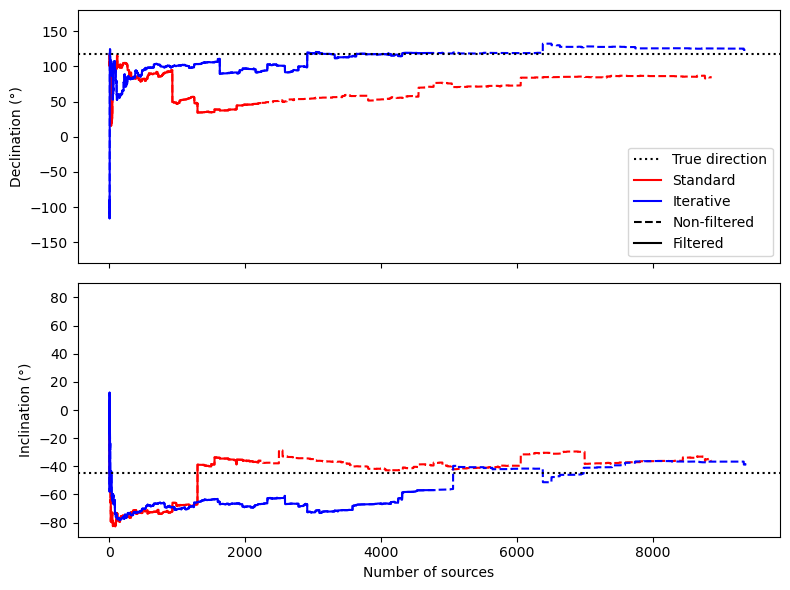

In [36]:
fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Panel A
axs[0].plot(range(2, len(dec_standard) + 2), dec_standard, ls='dashed', color='r')
axs[0].plot(range(2, len(dec_iterative) + 2), dec_iterative, ls='dashed', color='b')
# axs[0].set_title("Declinação (Sem Filtro)")
axs[0].set_ylabel("Declination (°)")
axs[0].grid()

# Panel B
axs[1].plot(range(2, len(inc_standard) + 2), inc_standard, ls='dashed', color='r')
axs[1].plot(range(2, len(inc_iterative) + 2), inc_iterative, ls='dashed', color='b')
# axs[1].set_title("Inclinação (Sem Filtro)")
axs[1].set_ylabel("Inclination (°)")
axs[1].grid()

# Panel C
axs[0].plot(range(2, len(dec_standard_filtered) + 2), dec_standard_filtered, color='r')
axs[0].plot(range(2, len(dec_iterative_filtered) + 2), dec_iterative_filtered, c='b')
axs[0].axhline(y=118, xmin=2/5000, xmax=1, color='k', ls='dotted', label='True direction')
axs[0].grid()

# Panel D
axs[1].plot(range(2, len(inc_standard_filtered) + 2), inc_standard_filtered, c='r')
axs[1].plot(range(2, len(inc_iterative_filtered) + 2), inc_iterative_filtered, c='b')
# axs[1].set_title("Inclinação (Com Filtro)")
axs[1].set_xlabel("Number of sources")


axs[0].plot([],[], c='r', label='Standard')
axs[0].plot([],[], c='b', label='Iterative')
axs[0].plot([],[], c='k', ls='dashed', label='Non-filtered')
axs[0].plot([],[], c='k', label='Filtered')
axs[1].axhline(y=-45, xmin=2/5000, xmax=1, color='k', ls='dotted', label='True direction')
axs[0].legend()
axs[1].grid()

axs[0].set_ylim(-180, 180)
axs[1].set_ylim(-90, 90)

plt.tight_layout()
plt.show()


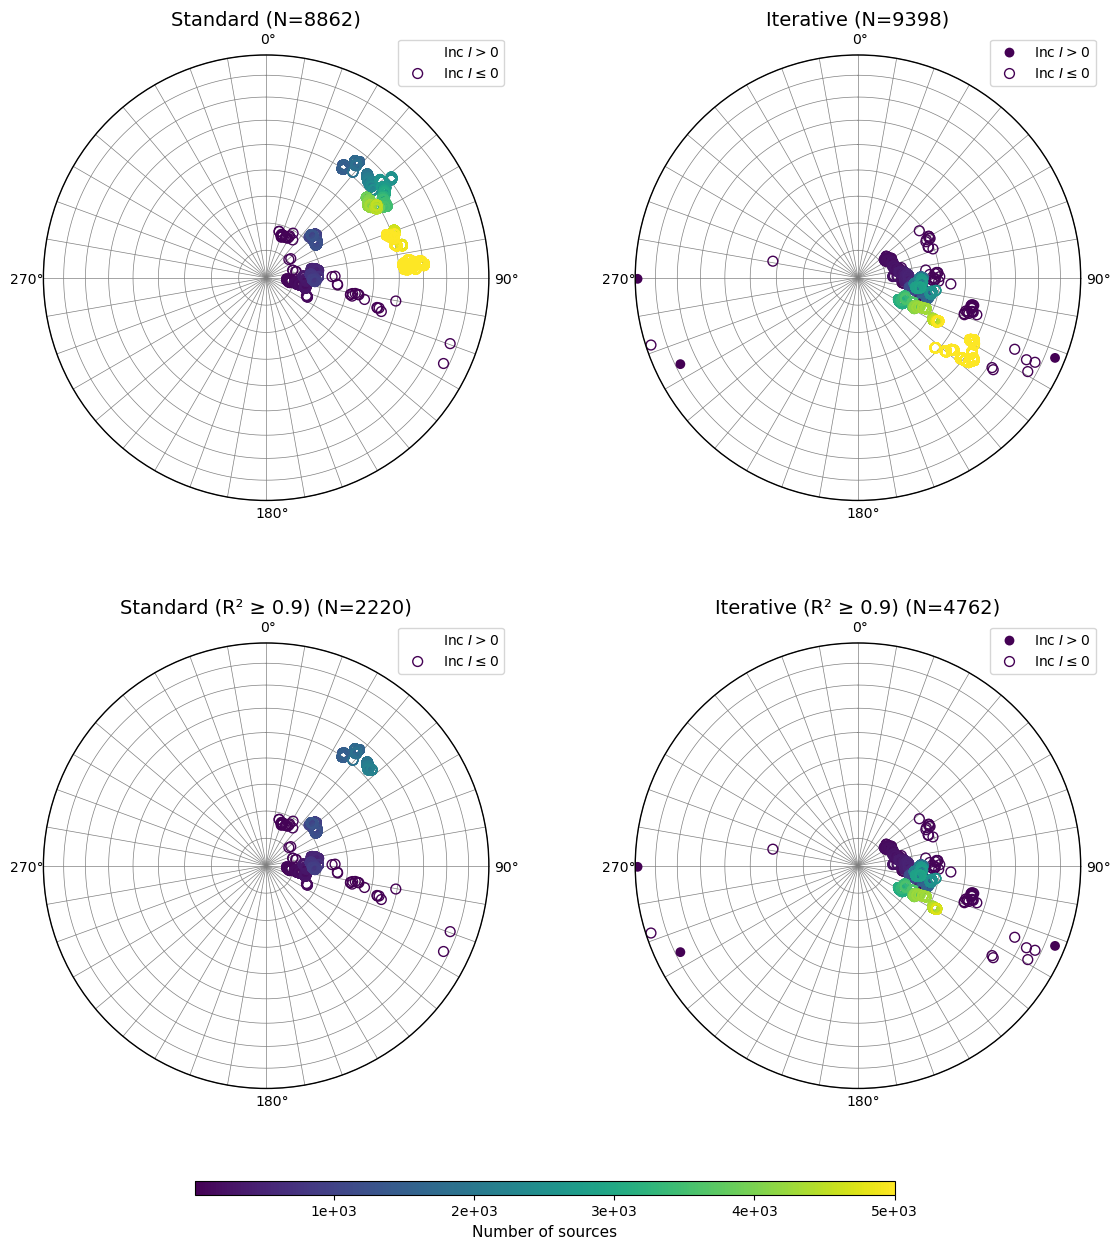

In [37]:
# Configuração inicial
fig, axes = plt.subplots(2, 2, figsize=(14, 14))
axes = axes.flatten()

titles = [
    "Standard",
    "Iterative",
    f"Standard (R² ≥ {r2})",
    f"Iterative (R² ≥ {r2})"
]

datasets = [
    (inc_standard, dec_standard, vector_sum_standard),
    (inc_iterative, dec_iterative, vector_sum_iterative),
    (inc_standard_filtered, dec_standard_filtered, vector_sum_standard_filtered),
    (inc_iterative_filtered, dec_iterative_filtered, vector_sum_iterative_filtered),
]

cmap = "viridis"  # Escolha um colormap

for ax, (title, (inc, dec, vector_sum)) in zip(axes, zip(titles, datasets)):
    # Calcular novo amplitude
    new_amp = range(2, len(inc) + 2)
    
    # Recalcular o vetor somado com nova amplitude
    new_vector_sum = mg.angles_to_vector(inc, dec, new_amp)
    
    # Criar a projeção estereográfica
    projection = mg.StereographicProjection(new_vector_sum)
    
    # Configurar kwargs para o scatter plot
    kwargs = dict(s=50, cmap=cmap, vmin=2, vmax=5000)
    
    # Plotar a projeção estereográfica
    tmp = projection.plot(ax=ax, draw_cross=False, add_radial_grid=True, label="Inc", add_legend=True, **kwargs)
    
    # Adicionar a quantidade de fontes no título
    num_sources = len(inc)
    ax.set_title(f"{title} (N={num_sources})", fontsize=14)

# Configuração da barra de cores compartilhada
clb = fig.colorbar(
    tmp,
    ax=axes,
    cax=fig.add_axes([0.25, 0.05, 0.5, 0.01]),
    format="%.0g",
    orientation="horizontal",
)
clb.set_label(label="Number of sources", fontsize=11)
clb.ax.tick_params(labelsize=10)

# Ajustar espaçamento e exibir o gráfico
# plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.show()


In [38]:
np.shape(dipole_moment_iterative)

(9400, 3)

# Hide all

In [39]:
# aaaaaaaa

In [40]:
# Pasta onde os arquivos CSV estão localizados
csv_folder = "csv_files_real_data"
# Listas para armazenar os momentos dipolares
mx_all_standard, my_all_standard, mz_all_standard = [], [], []
mx_all_iterative, my_all_iterative, mz_all_iterative = [], [], []

# Listas para armazenar os valores de R²
r2_all_standard, r2_all_iterative = [], []

# Processar os arquivos da pasta
for file in os.listdir(csv_folder):
    if file.endswith("_standard.csv"):
        # Ler os arquivos padrão
        df_standard = pd.read_csv(os.path.join(csv_folder, file))
        mx_all_standard.extend(df_standard['mx_standard'].values)
        my_all_standard.extend(df_standard['my_standard'].values)
        mz_all_standard.extend(df_standard['mz_standard'].values)
        r2_all_standard.extend(df_standard['r_2_standard'].values)

    elif file.endswith("_iterative.csv"):
        # Ler os arquivos iterativos
        df_iterative = pd.read_csv(os.path.join(csv_folder, file))
        mx_all_iterative.extend(df_iterative['mx_iterative'].values)
        my_all_iterative.extend(df_iterative['my_iterative'].values)
        mz_all_iterative.extend(df_iterative['mz_iterative'].values)
        r2_all_iterative.extend(df_iterative['r_2_iterative'].values)

# Criar as listas com as soluções finais para os momentos dipolares
dipole_moment_standard = np.array([
    np.array(mx_all_standard), 
    np.array(my_all_standard), 
    np.array(mz_all_standard)
]).T

dipole_moment_iterative = np.array([
    np.array(mx_all_iterative), 
    np.array(my_all_iterative), 
    np.array(mz_all_iterative)
]).T

# Criar arrays para os valores de R²
r2_standard = np.array(r2_all_standard)
r2_iterative = np.array(r2_all_iterative)


In [41]:
dipole_moment_standard = dipole_moment_standard[r2_standard >= r2]
dipole_moment_iterative = dipole_moment_iterative[r2_iterative >= r2]

r2_standard = r2_standard[r2_standard >= r2]
r2_iterative = r2_iterative[r2_iterative >= r2]

In [42]:
norm_standard = np.linalg.norm(dipole_moment_standard, axis=1)
norm_iterative = np.linalg.norm(dipole_moment_iterative, axis=1)

norm_standard

array([4.09774172e-14, 1.19587945e-12, 2.72058840e-13, ...,
       6.89683491e-14, 9.22990733e-14, 4.88457265e-15])

In [43]:
indices_standard = np.argsort(norm_standard)[::-1]
indices_iterative = np.argsort(norm_iterative)[::-1]

norm_iterative[indices_iterative]
norm_standard[indices_standard]

array([1.70622826e-10, 5.18444236e-11, 3.98142586e-11, ...,
       1.18763330e-15, 1.08538704e-15, 7.68156082e-16])

In [44]:
dipole_moment_standard = dipole_moment_standard[indices_standard]
dipole_moment_iterative = dipole_moment_iterative[indices_iterative]
r2_standard = r2_standard[indices_standard]
r2_iterative = r2_iterative[indices_iterative]

In [45]:
def angle_misfit(inc_1, dec_1, inc_2, dec_2):
    
    vector_1 = mg.angles_to_vector(inc_1, dec_1, 1)
    vector_2 = mg.angles_to_vector(inc_2, dec_2, 1)
    
    # calculating dot product
    dot_product = np.dot(vector_1, vector_2)

    # calculating angles in radians
    cos_theta = dot_product
    theta_rad = np.arccos(cos_theta)

    # converting to degrees
    theta_deg = float(np.degrees(theta_rad))
    
    return(np.round(theta_deg, 2))  

In [46]:
# Defina sua direção de referência (por exemplo, vetor unitário)
inc_ref, dec_ref = -48, 119
# inc_ref, dec_ref = -2, 103
reference_vector = mg.angles_to_vector(inc_ref, dec_ref, 1)  # exemplo, ajuste conforme necessário

angular_distance_standard = []
angular_distance_iterative = []
vector_sum_standard, vector_sum_iterative = [], []
inc_standard, dec_standard = [], []
inc_iterative, dec_iterative = [], []
# Calculando a distância angular para a metodologia "standard"
for n in range(2, len(dipole_moment_standard[:, 0])+1):
    vector_sum_st = np.sum(dipole_moment_standard[:n, :], axis=0, dtype=np.float64)
    inc_st, dec_st, _ = mg.vector_to_angles(vector_sum_st)
    vector_sum_standard.append(vector_sum_st)
    inc_standard.append(inc_st)
    dec_standard.append(dec_st)
    # Calcula a distância angular
    # angular_distance_value=angle_misfit(inc_ref, dec_ref, inc, dec)
    angular_distance_value_st = angular_distance(reference_vector, vector_sum_st)
    angular_distance_standard.append(angular_distance_value_st)

# Calculando a distância angular para a metodologia "iterative"
for n in range(2, len(dipole_moment_iterative[:, 0])+1):
    vector_sum_it = np.sum(dipole_moment_iterative[:n, :], axis=0, dtype=np.float64)
    inc_it, dec_it, _ = mg.vector_to_angles(vector_sum_it)
    vector_sum_iterative.append(vector_sum_it)
    inc_iterative.append(inc_it)
    dec_iterative.append(dec_it)
    # Calcula a distância angular
    angular_distance_value_it = angular_distance(reference_vector, vector_sum_it)
    # angular_distance_value=angle_misfit(inc_ref, dec_ref, inc, dec)
    angular_distance_iterative.append(angular_distance_value_it)


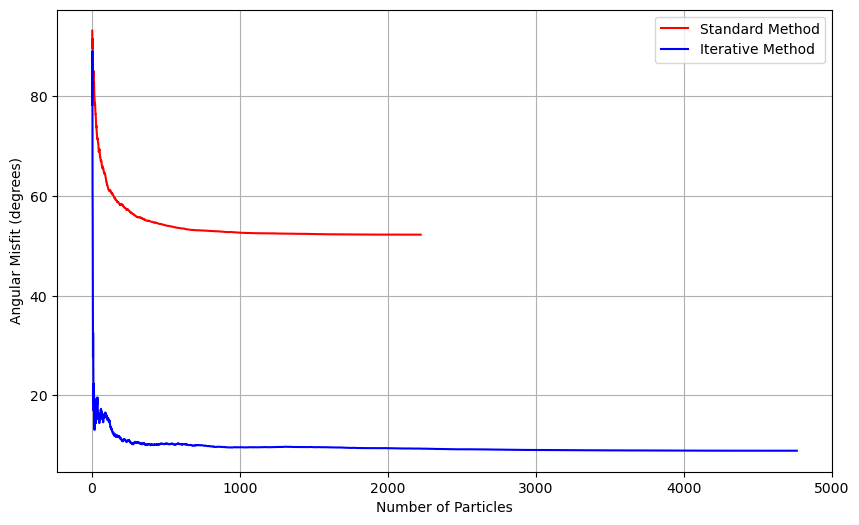

In [47]:
# Número de partículas é equivalente a 'n' nos loops, então você pode usar o range de 'n' para o eixo x
num_particles_standard = list(range(2, len(dipole_moment_standard[:, 0])+1))
num_particles_iterative = list(range(2, len(dipole_moment_iterative[:, 0])+1))

# Plotando as distâncias angulares
plt.figure(figsize=(10, 6))

# Plot para a metodologia "standard"
plt.plot(num_particles_standard, angular_distance_standard, label='Standard Method', c='r')

# Plot para a metodologia "iterative"
plt.plot(num_particles_iterative, angular_distance_iterative, label='Iterative Method', c='b')

# Adicionando rótulos e título
plt.xlabel('Number of Particles')
plt.ylabel('Angular Misfit (degrees)')
# plt.title('Angular Distance vs Number of Particles')
plt.legend()

# Exibindo o gráfico
plt.grid(True)
plt.show()


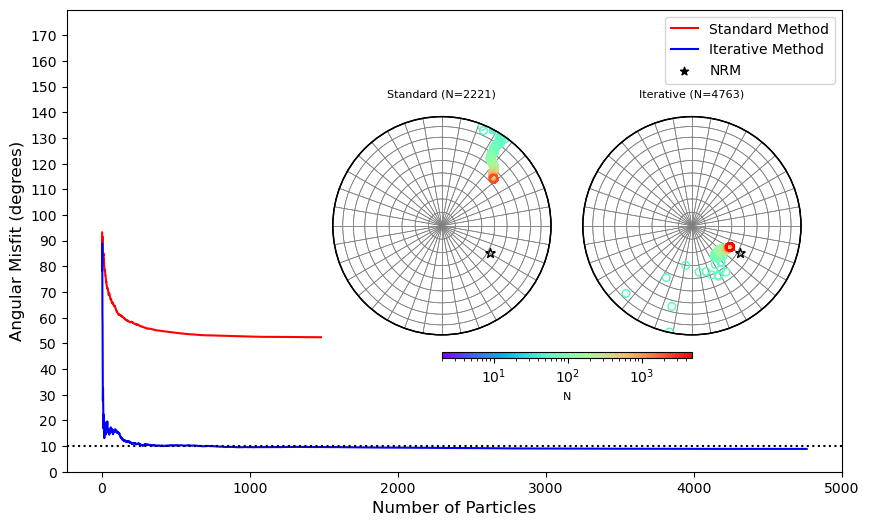

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Número de partículas é equivalente a 'n' nos loops, então você pode usar o range de 'n' para o eixo x
num_particles_standard = list(range(2, len(dipole_moment_standard[:, 0])+1))
num_particles_iterative = list(range(2, len(dipole_moment_iterative[:, 0])+1))

# Criar a figura principal
fig, ax = plt.subplots(figsize=(10, 6))

# Plotando as distâncias angulares
ax.plot(num_particles_standard, angular_distance_standard, label='Standard Method', c='r')
ax.plot(num_particles_iterative, angular_distance_iterative, label='Iterative Method', c='b')
ax.set_xlabel('Number of Particles', fontsize=12)
ax.set_ylabel('Angular Misfit (degrees)', fontsize=12)
ax.scatter([],[], marker='*',label='NRM', c='k')
ax.axhline(y=10, xmin=2/5000, xmax=1, color='k', ls='dotted')
# ax.text(5800, 12, '10°')
ax.legend()


# Definindo áreas para as projeções estereográficas dentro do gráfico principal
# Definindo a posição das projeções dentro do gráfico com (x0, y0, width, height)
projection_positions = [
    (0.3, 0.32, 0.4, 0.4),  # Posição do gráfico de projeção padrão
    (0.55, 0.32, 0.4, 0.4)   # Posição do gráfico de projeção iterativo
]

# Títulos e dados para os subgráficos
titles = [
    "Standard",
    "Iterative"
]

datasets = [
    (inc_standard, dec_standard, vector_sum_standard),
    (inc_iterative, dec_iterative, vector_sum_iterative)
]

cmap = "rainbow"  # Escolha um colormap
maximum = np.max([len(inc_standard), len(inc_iterative)])
cmap_norm = matplotlib.colors.LogNorm #Normalize
# Plotando as projeções estereográficas nas posições definidas
for pos, (title, (inc, dec, vector_sum)) in zip(projection_positions, zip(titles, datasets)):
    # Calcular novo amplitude
    new_amp = range(50, len(inc)+50)
    
    # Recalcular o vetor somado com nova amplitude
    new_vector_sum = mg.angles_to_vector(inc, dec, new_amp)
    
    # Criar a projeção estereográfica
    projection = mg.StereographicProjection(new_vector_sum)
    projection_R = mg.StereographicProjection(np.reshape(reference_vector,(1,3)))
    
    # Adicionar a área para o gráfico de projeção estereográfica
    inset_ax = fig.add_axes(pos)
    
    # Configurar kwargs para o scatter plot
    kwargs = dict(s=30, cmap=cmap, vmin=2, vmax=maximum, cmap_norm=cmap_norm)
    
    # Plotar a projeção estereográfica no inset
    tmp = projection.plot(ax=inset_ax, add_ticks=False,  **kwargs)
    tmp_R = projection_R.plot(ax=inset_ax, add_ticks=False, s=50, marker='*')
    
    # Adicionar a quantidade de fontes no título
    num_sources = len(inc)
    inset_ax.set_title(f"{title} (N={num_sources})", fontsize=8)

# Configuração da barra de cores compartilhada
clb = fig.colorbar(
    tmp,
    ax=ax,
    cax=fig.add_axes([0.5, 0.3, 0.25, 0.01]),
    # format="%.0g",
    orientation="horizontal",
)
clb.set_label(label="N", fontsize=8)
clb.ax.tick_params(labelsize=10)

ax.set_yticks(np.arange(0,180,10))
ax.set_ylim(0,180)
# plt.tight_layout()  # Ajusta o layout automaticamente
plt.show()


In [24]:
def jackknife_vector_sum(vectors):
    n = vectors.shape[0]  # Number of vectors
    
    # Compute all vector sums excluding one vector at a time
    jackknife_sums = np.array([vectors.sum(axis=0) - vectors[i] for i in range(n)])
    
    # Mean of the Jackknife sums
    mean_jack = jackknife_sums.mean(axis=0)
    
    # Jackknife standard error (SE_jack per component)
    se_jack = np.sqrt((n - 1) * np.mean((jackknife_sums - mean_jack) ** 2, axis=0))
    
    return mean_jack, se_jack
mean_jack_st, se_jack_st = jackknife_vector_sum(np.asarray(vector_sum_standard))
print("Jackknife vector sum:", mean_jack_st)
print("Jackknife SE:", se_jack_st)
print("Angular misfit Jackknife:", angular_distance(reference_vector, mean_jack_st))
print()
mean_jack_it, se_jack_it = jackknife_vector_sum(np.asarray(vector_sum_iterative))
print("Jackknife vector sum:", mean_jack_it)
print("Jackknife SE:", se_jack_it)
print("Angular misfit Jackknife:", angular_distance(reference_vector, mean_jack_it))

Jackknife vector sum: [4.79915477e-07 4.57697364e-07 4.63053104e-07]
Jackknife SE: [7.56326529e-10 1.34314360e-10 1.39514510e-09]
Angular misfit Jackknife: 53.9056919267894

Jackknife vector sum: [ 1.12109503e-06 -6.41166008e-07  2.01751411e-06]
Jackknife SE: [2.21287958e-09 6.94410784e-10 2.98404434e-09]
Angular misfit Jackknife: 9.386408445908494


ValueError: x and y must have same first dimension, but have shapes (2172,) and (2221,)

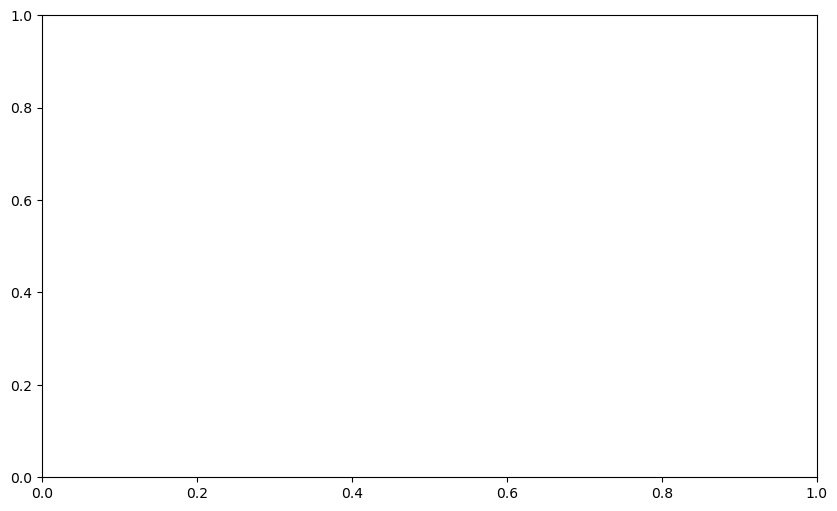

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Número de partículas é equivalente a 'n' nos loops, então você pode usar o range de 'n' para o eixo x
num_particles_standard = list(range(50, len(dipole_moment_standard[:, 0])))
num_particles_iterative = list(range(50, len(dipole_moment_iterative[:, 0])))

# Criar a figura principal
fig, ax = plt.subplots(figsize=(10, 6))

# Plotando as distâncias angulares
ax.plot(num_particles_standard, angular_distance_standard, label='Standard Method', c='r')
ax.plot(num_particles_iterative, angular_distance_iterative, label='Iterative Method', c='b')
ax.set_xlabel('Number of Particles (N)', fontsize=12)
ax.set_ylabel('Angular Misfit (degrees)', fontsize=12)
ax.scatter([],[], marker='*',label='NRM', c='k')
ax.scatter([],[], marker='s',label='Jackknife Mean', c='k')
ax.axhline(y=10, xmin=2/5000, xmax=1, color='k', ls='dotted')
ax.legend(loc='upper left')


# Definindo áreas para as projeções estereográficas dentro do gráfico principal
# Definindo a posição das projeções dentro do gráfico com (x0, y0, width, height)
projection_positions = [
    (0.3, 0.32, 0.4, 0.4),  # Posição do gráfico de projeção padrão
    (0.55, 0.32, 0.4, 0.4)   # Posição do gráfico de projeção iterativo
]

projection_positions = [
    (0.35, 0.42, 0.4, 0.4),  # Posição do gráfico de projeção padrão
    (0.58, 0.42, 0.4, 0.4)   # Posição do gráfico de projeção iterativo
]


# Títulos e dados para os subgráficos
titles = [
    "Standard",
    "Iterative"
]

datasets = [
    (inc_standard, dec_standard, vector_sum_standard, mean_jack_st),
    (inc_iterative, dec_iterative, vector_sum_iterative, mean_jack_it)
]


cmap = "rainbow"  # Escolha um colormap
maximum = np.max([len(inc_standard), len(inc_iterative)])
cmap_norm = matplotlib.colors.LogNorm #Normalize
# Plotando as projeções estereográficas nas posições definidas
for pos, (title, (inc, dec, vector_sum, jack)) in zip(projection_positions, zip(titles, datasets)):
    # Calcular novo amplitude
    new_amp = range(50, len(inc) + 50)
    
    # Recalcular o vetor somado com nova amplitude
    new_vector_sum = mg.angles_to_vector(inc, dec, new_amp)
    
    # Criar a projeção estereográfica
    projection = mg.StereographicProjection(new_vector_sum)
    projection_R = mg.StereographicProjection(np.reshape(reference_vector,(1,3))) 
    projection_J = mg.StereographicProjection(np.reshape(jack,(1,3))) 
    # Adicionar a área para o gráfico de projeção estereográfica
    inset_ax = fig.add_axes(pos)
    # Configurar kwargs para o scatter plot
    kwargs = dict(s=30, cmap=cmap, vmin=2, vmax=maximum, cmap_norm=cmap_norm)
    
    # Plotar a projeção estereográfica no inset
    tmp = projection.plot(ax=inset_ax, add_ticks=False,  **kwargs)
    tmp_R = projection_R.plot(ax=inset_ax, add_ticks=False, s=50, marker='*')
    tmp_J = projection_J.plot(ax=inset_ax, add_ticks=False, s=30, marker='s')
    
    # Adicionar a quantidade de fontes no título
    num_sources = len(inc)
    inset_ax.set_title(f"{title} (N={num_sources})", fontsize=8)
# Configuração da barra de cores compartilhada
clb = fig.colorbar(
    tmp,
    ax=ax,
    # cax=fig.add_axes([0.5, 0.3, 0.25, 0.01]),
    cax=fig.add_axes([0.54, 0.38, 0.25, 0.01]),
    # format="%.0g",
    orientation="horizontal",
)
clb.set_label(label="N", fontsize=8)
clb.ax.tick_params(labelsize=10)

ax.set_yticks(np.arange(10,180,10))
ax.set_ylim(0,180)
# plt.tight_layout()  # Ajusta o layout automaticamente
# ax.grid(True)
# fig.savefig(fig_dir / "ceramic-data-stereoplot.png", dpi=300, facecolor='w', bbox_inches='tight')
plt.show()


In [ ]:
import numba
import numpy as np
from numba import njit, prange

@njit
def angular_distance(vec_a, vec_b):
    # Calculando o produto escalar
    dot_product = 0.0
    for i in range(len(vec_a)):
        dot_product += vec_a[i] * vec_b[i]

    # Calculando as magnitudes manualmente
    magnitude_a = 0.0
    magnitude_b = 0.0
    for i in range(len(vec_a)):
        magnitude_a += vec_a[i] ** 2
        magnitude_b += vec_b[i] ** 2
    magnitude_a = np.sqrt(magnitude_a)
    magnitude_b = np.sqrt(magnitude_b)

    cos_theta = dot_product / (magnitude_a * magnitude_b)
    theta = np.arccos(cos_theta)
    return np.degrees(theta)

@njit
def jackknife_vector_sum(vectors):
    n = vectors.shape[0]
    jackknife_estimates = np.zeros((n, vectors.shape[1]))

    # Exclui um vetor de cada vez e calcula a soma dos vetores restantes
    for i in range(n):
        sum_vector = np.zeros(vectors.shape[1])
        for j in range(n):
            if j != i:  # Não inclui o vetor na posição 'i'
                for k in range(vectors.shape[1]):
                    sum_vector[k] += vectors[j, k]
        jackknife_estimates[i] = sum_vector / (n - 1)
    
    # A média dos jackknife estimates será a estimativa final
    mean_jackknife = np.zeros(vectors.shape[1])
    for i in range(n):
        mean_jackknife += jackknife_estimates[i]
    mean_jackknife /= n
    return mean_jackknife

@njit(parallel=True)
def compute_jackknife_errors(vector_sum_iterative, vector_sum_standard, reference_vector, num_samples=50):
    n_iter = vector_sum_iterative.shape[0]
    n_stand = vector_sum_standard.shape[0]
    
    accum_error_it = np.empty(n_iter - 2)
    accum_error_st = np.empty(n_stand - 2)

    for i in prange(n_iter - 2):
        # Para Jackknife normal: excluindo um vetor por vez
        vector = np.asarray(vector_sum_iterative)[: i + 2, :]
        mean_jackknife = jackknife_vector_sum(vector)
        error = angular_distance(reference_vector, mean_jackknife)
        accum_error_it[i] = error

    for i in prange(n_stand - 2):
        # Para Jackknife normal: excluindo um vetor por vez
        vector = np.asarray(vector_sum_standard)[: i + 2, :]
        mean_jackknife = jackknife_vector_sum(vector)
        error = angular_distance(reference_vector, mean_jackknife)
        accum_error_st[i] = error

    return accum_error_it, accum_error_st


accum_error_it, accum_error_st = compute_jackknife_errors(np.array(vector_sum_iterative), 
                                                          np.array(vector_sum_standard), 
                                                          reference_vector)


# Plotando as distâncias angulares
plt.figure(figsize=(10, 6))



plt.plot(num_particles_standard, angular_distance_standard, label='Standard Method', c='r')
plt.plot(num_particles_iterative, angular_distance_iterative, label='Iterative Method', c='b')

plt.plot(np.arange(2, np.shape(vector_sum_standard)[0]), accum_error_st, c='r', ls='--')
plt.plot(np.arange(2, np.shape(vector_sum_iterative)[0]), accum_error_it, c='b', ls='--')
plt.plot([],[], label='Simple Sum', c='k')
plt.plot([],[], label='Jackknife Resample', ls='--', c='k')


plt.xlabel('Number of Particles')
plt.ylabel('Angular Misfit')


# Adicionando rótulos e título
plt.xlabel('Number of Particles')
plt.ylabel('Angular Misfit (degrees)')
# plt.title('Angular Distance vs Number of Particles')
plt.legend()
plt.yticks(np.arange(10,180,10))
plt.ylim(0,110)

# plt.axhline(y=10, xmin=2/5000, xmax=1, color='k', ls='dotted')
plt.grid(True, ls=':')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Número de partículas é equivalente a 'n' nos loops, então você pode usar o range de 'n' para o eixo x
num_particles_standard = list(range(50, len(dipole_moment_standard[:, 0])))
num_particles_iterative = list(range(50, len(dipole_moment_iterative[:, 0])))

# Criar a figura principal
fig, ax = plt.subplots(figsize=(10, 6))

# Plotando as distâncias angulares
ax.plot(num_particles_standard, angular_distance_standard, label='Standard Method', c='r')
ax.plot(num_particles_iterative, angular_distance_iterative, label='Iterative Method', c='b')
ax.set_xlabel('Number of Particles (N)', fontsize=12)
ax.set_ylabel('Angular Misfit (degrees)', fontsize=12)
ax.scatter([],[], marker='*',label='NRM', c='k')
ax.scatter([],[], marker='s',label='Cumulative Vector', c='k')
ax.axhline(y=10, xmin=2/5000, xmax=1, color='k', ls='dotted')
ax.legend(loc='upper left')


# Definindo áreas para as projeções estereográficas dentro do gráfico principal
# Definindo a posição das projeções dentro do gráfico com (x0, y0, width, height)
projection_positions = [
    (0.3, 0.32, 0.4, 0.4),  # Posição do gráfico de projeção padrão
    (0.55, 0.32, 0.4, 0.4)   # Posição do gráfico de projeção iterativo
]

projection_positions = [
    (0.35, 0.42, 0.4, 0.4),  # Posição do gráfico de projeção padrão
    (0.58, 0.42, 0.4, 0.4)   # Posição do gráfico de projeção iterativo
]


# Títulos e dados para os subgráficos
titles = [
    "Standard",
    "Iterative"
]

sum_st = vector_sum_standard[-1]
sum_it = vector_sum_iterative[-1]

datasets = [
    (inc_standard, dec_standard, vector_sum_standard, sum_st),
    (inc_iterative, dec_iterative, vector_sum_iterative, sum_it)
]


cmap = "rainbow"  # Escolha um colormap
maximum = np.max([len(inc_standard), len(inc_iterative)])
cmap_norm = matplotlib.colors.LogNorm #Normalize
# Plotando as projeções estereográficas nas posições definidas
for pos, (title, (inc, dec, vector_sum, sum_vector)) in zip(projection_positions, zip(titles, datasets)):
    # Calcular novo amplitude
    new_amp = range(2, len(inc) + 2)
    
    # Recalcular o vetor somado com nova amplitude
    new_vector_sum = mg.angles_to_vector(inc, dec, new_amp)
    
    # Criar a projeção estereográfica
    projection = mg.StereographicProjection(new_vector_sum)
    projection_R = mg.StereographicProjection(np.reshape(reference_vector,(1,3))) 
    projection_J = mg.StereographicProjection(np.reshape(sum_vector,(1,3))) 
    # Adicionar a área para o gráfico de projeção estereográfica
    inset_ax = fig.add_axes(pos)
    # Configurar kwargs para o scatter plot
    kwargs = dict(s=30, cmap=cmap, vmin=2, vmax=maximum, cmap_norm=cmap_norm)
    
    # Plotar a projeção estereográfica no inset
    tmp = projection.plot(ax=inset_ax, add_ticks=False,  **kwargs)
    tmp_R = projection_R.plot(ax=inset_ax, add_ticks=False, s=50, marker='*')
    tmp_J = projection_J.plot(ax=inset_ax, add_ticks=False, s=30, marker='s')
    
    # Adicionar a quantidade de fontes no título
    num_sources = len(inc)
    inset_ax.set_title(f"{title} (N={num_sources})", fontsize=8)
# Configuração da barra de cores compartilhada
clb = fig.colorbar(
    tmp,
    ax=ax,
    # cax=fig.add_axes([0.5, 0.3, 0.25, 0.01]),
    cax=fig.add_axes([0.54, 0.38, 0.25, 0.01]),
    # format="%.0g",
    orientation="horizontal",
)
clb.set_label(label="N", fontsize=8)
clb.ax.tick_params(labelsize=10)

ax.set_yticks(np.arange(10,180,10))
ax.set_ylim(0,180)
# plt.tight_layout()  # Ajusta o layout automaticamente
# ax.grid(True)
fig.savefig(fig_dir / "ceramic-data-stereoplot.png", dpi=300, facecolor='w', bbox_inches='tight')
plt.show()


In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)


# Panel C
axs[0].plot(range(50, len(dec_standard) + 50), dec_standard, color='r')
axs[0].plot(range(50, len(dec_iterative) + 50), dec_iterative, c='b')
axs[0].axhline(y=118, xmin=2/5000, xmax=1, color='k', ls='dotted', label='NRM direction')
axs[0].axhline(y=108, xmin=2/5000, xmax=1, color='k', ls='dashed', label='Primary direction')
axs[0].grid()

# Panel D
axs[1].plot(range(2, len(inc_standard) + 2), inc_standard, c='r')
axs[1].plot(range(2, len(inc_iterative) + 2), inc_iterative, c='b')
# axs[1].set_title("Inclinação (Com Filtro)")
axs[1].set_xlabel("Number of sources")


axs[0].plot([],[], c='r', label='Standard')
axs[0].plot([],[], c='b', label='Iterative')
# axs[0].plot([],[], c='k', ls='dashed', label='Non-filtered')
# axs[0].plot([],[], c='k', label='Filtered')
axs[1].axhline(y=-45, xmin=2/5000, xmax=1, color='k', ls='dotted', label='True direction')
axs[1].axhline(y=-2, xmin=2/5000, xmax=1, color='k', ls='dashed', label='Primary direction')

axs[0].legend()
axs[1].grid()

axs[0].set_ylim(-180, 180)
axs[1].set_ylim(-90, 90)

plt.tight_layout()
plt.show()


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].boxplot(r2_standard)
axes[0].set_title("Standard Method")
axes[0].set_ylabel("log10(Norm)")

axes[1].boxplot(r2_iterative)
axes[1].set_title("Iterative Method")

plt.tight_layout()
plt.show()

In [ ]:
aaaaaaaa

# Filter by amplitude

In [ ]:
# Pasta onde os arquivos CSV estão localizados
csv_folder = "csv_files_real_data"
# Listas para armazenar os momentos dipolares
mx_all_standard, my_all_standard, mz_all_standard = [], [], []
mx_all_iterative, my_all_iterative, mz_all_iterative = [], [], []

# Listas para armazenar os valores de R²
r2_all_standard, r2_all_iterative = [], []

# Processar os arquivos da pasta
for file in os.listdir(csv_folder):
    if file.endswith("_standard.csv"):
        # Ler os arquivos padrão
        df_standard = pd.read_csv(os.path.join(csv_folder, file))
        mx_all_standard.extend(df_standard['mx_standard'].values)
        my_all_standard.extend(df_standard['my_standard'].values)
        mz_all_standard.extend(df_standard['mz_standard'].values)
        r2_all_standard.extend(df_standard['r_2_standard'].values)

    elif file.endswith("_iterative.csv"):
        # Ler os arquivos iterativos
        df_iterative = pd.read_csv(os.path.join(csv_folder, file))
        mx_all_iterative.extend(df_iterative['mx_iterative'].values)
        my_all_iterative.extend(df_iterative['my_iterative'].values)
        mz_all_iterative.extend(df_iterative['mz_iterative'].values)
        r2_all_iterative.extend(df_iterative['r_2_iterative'].values)

# Criar as listas com as soluções finais para os momentos dipolares
dipole_moment_standard = np.array([
    np.array(mx_all_standard), 
    np.array(my_all_standard), 
    np.array(mz_all_standard)
]).T

dipole_moment_iterative = np.array([
    np.array(mx_all_iterative), 
    np.array(my_all_iterative), 
    np.array(mz_all_iterative)
]).T

# Criar arrays para os valores de R²
r2_standard = np.array(r2_all_standard)
r2_iterative = np.array(r2_all_iterative)


In [ ]:
# r2 = 0.85#-np.inf
dipole_moment_standard = dipole_moment_standard[r2_standard >= r2]
dipole_moment_iterative = dipole_moment_iterative[r2_iterative >= r2]

r2_standard = r2_standard[r2_standard >= r2]
r2_iterative = r2_iterative[r2_iterative >= r2]

In [ ]:
norm_standard = np.linalg.norm(dipole_moment_standard, axis=1)
norm_iterative = np.linalg.norm(dipole_moment_iterative, axis=1)

In [ ]:
indices_standard = np.argsort(norm_standard)#[::-1]
indices_iterative = np.argsort(norm_iterative)#[::-1]

# r2_iterative[indices_iterative]
norm_iterative[indices_iterative]
dipole_moment_standard = dipole_moment_standard[indices_standard]
dipole_moment_iterative = dipole_moment_iterative[indices_iterative]
r2_standard = r2_standard[indices_standard]
r2_iterative = r2_iterative[indices_iterative]

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].boxplot(np.log10(norm_standard))
axes[0].set_title("Standard Method")
axes[0].set_ylabel("log10(Norm)")

axes[1].boxplot(np.log10(norm_iterative))
axes[1].set_title("Iterative Method")

plt.tight_layout()
plt.show()

In [ ]:
def remove_outliers(moments):
    # Calculate the norm of each dipole vector
    norm_values = np.linalg.norm(moments, axis=1)

    # Apply log10 to the norm values to adjust for orders of magnitude
    log_norm_values = np.log10(norm_values)

    # Calculate Q1 (first quartile) and Q3 (third quartile) in the logarithmic scale
    Q1 = np.percentile(log_norm_values, 25)
    Q3 = np.percentile(log_norm_values, 75)

    # Calculate the IQR (Interquartile Range) in the logarithmic scale
    IQR = Q3 - Q1

    # Determine the upper and lower bounds for outliers in the logarithmic scale
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers
    outliers_filtered = moments[(log_norm_values >= lower_bound) & (log_norm_values <= upper_bound)]
    
    return outliers_filtered
dipole_moment_standard  = remove_outliers(dipole_moment_standard)
dipole_moment_iterative = remove_outliers(dipole_moment_iterative)

In [ ]:
# # Filtrar os valores dentro do intervalo desejado
# mask_standard = (norm_standard < 10**(-11.5)) #& (norm_standard < 1.0e-11)
# mask_iterative = (norm_iterative < 10**(-11.5 )) #& (norm_iterative < 1.0e-11)

In [ ]:
# # r2 = 0.85#-np.inf
# dipole_moment_standard = dipole_moment_standard[mask_standard]
# dipole_moment_iterative = dipole_moment_iterative[mask_iterative]

# r2_standard = r2_standard[mask_standard]
# r2_iterative = r2_iterative[mask_iterative]

In [ ]:
# indices_standard = np.argsort(r2_standard[r2_standard >= r2])[::-1]
# indices_iterative = np.argsort(r2_iterative[r2_iterative >= r2])[::-1]

In [ ]:
# Defina sua direção de referência (por exemplo, vetor unitário)
inc_ref, dec_ref = -48, 119
reference_vector = mg.angles_to_vector(inc_ref, dec_ref, 1)  # exemplo, ajuste conforme necessário


angular_distance_standard = []
angular_distance_iterative = []
vector_sum_standard, vector_sum_iterative = [], []
inc_standard, dec_standard = [], []
inc_iterative, dec_iterative = [], []
# Calculando a distância angular para a metodologia "standard"
for n in range(2, len(dipole_moment_standard[:, 0])):
    vector_sum = np.sum(dipole_moment_standard[:n, :], axis=0)
    inc, dec, _ = mg.vector_to_angles(vector_sum)
    vector_sum_standard.append(vector_sum)
    inc_standard.append(inc)
    dec_standard.append(dec)
    # Calcula a distância angular
    angular_distance_value = angular_distance(reference_vector, vector_sum)
    angular_distance_standard.append(angular_distance_value)

# Calculando a distância angular para a metodologia "iterative"
for n in range(2, len(dipole_moment_iterative[:, 0])):
    vector_sum = np.sum(dipole_moment_iterative[:n, :], axis=0)
    inc, dec, _ = mg.vector_to_angles(vector_sum)
    vector_sum_iterative.append(vector_sum)
    inc_iterative.append(inc)
    dec_iterative.append(dec)

    # Calcula a distância angular
    angular_distance_value = angular_distance(reference_vector, vector_sum)
    angular_distance_iterative.append(angular_distance_value)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Número de partículas é equivalente a 'n' nos loops, então você pode usar o range de 'n' para o eixo x
num_particles_standard = list(range(2, len(dipole_moment_standard[:, 0])))
num_particles_iterative = list(range(2, len(dipole_moment_iterative[:, 0])))

# Criar a figura principal
fig, ax = plt.subplots(figsize=(10, 6))

# Plotando as distâncias angulares
ax.plot(num_particles_standard, angular_distance_standard, label='Standard Method', c='r')
ax.plot(num_particles_iterative, angular_distance_iterative, label='Iterative Method', c='b')
ax.set_xlabel('Number of Particles (N)', fontsize=12)
ax.set_ylabel('Angular Misfit (degrees)', fontsize=12)
ax.scatter([],[], marker='*',label='NRM', c='k')
ax.axhline(y=10, xmin=2/5000, xmax=1, color='k', ls='dotted')
# ax.text(5600, 12, '10°')
ax.legend()


# Definindo áreas para as projeções estereográficas dentro do gráfico principal
# Definindo a posição das projeções dentro do gráfico com (x0, y0, width, height)
projection_positions = [
    (0.3, 0.32, 0.4, 0.4),  # Posição do gráfico de projeção padrão
    (0.55, 0.32, 0.4, 0.4)   # Posição do gráfico de projeção iterativo
]

# Títulos e dados para os subgráficos
titles = [
    "Standard",
    "Iterative"
]

datasets = [
    (inc_standard, dec_standard, vector_sum_standard),
    (inc_iterative, dec_iterative, vector_sum_iterative)
]

cmap = "rainbow"  # Escolha um colormap
maximum = np.max([len(inc_standard), len(inc_iterative)])
cmap_norm = matplotlib.colors.LogNorm #Normalize
# Plotando as projeções estereográficas nas posições definidas
for pos, (title, (inc, dec, vector_sum)) in zip(projection_positions, zip(titles, datasets)):
    # Calcular novo amplitude
    new_amp = range(2, len(inc) + 2)
    
    # Recalcular o vetor somado com nova amplitude
    new_vector_sum = mg.angles_to_vector(inc, dec, new_amp)
    
    # Criar a projeção estereográfica
    projection = mg.StereographicProjection(new_vector_sum)
    projection_R = mg.StereographicProjection(np.reshape(reference_vector,(1,3)))
    
    # Adicionar a área para o gráfico de projeção estereográfica
    inset_ax = fig.add_axes(pos)
    
    # Configurar kwargs para o scatter plot
    kwargs = dict(s=30, cmap=cmap, vmin=2, vmax=maximum, cmap_norm=cmap_norm)
    
    # Plotar a projeção estereográfica no inset
    tmp = projection.plot(ax=inset_ax, add_ticks=False,  **kwargs)
    tmp_R = projection_R.plot(ax=inset_ax, add_ticks=False, s=50, marker='*')
    
    # Adicionar a quantidade de fontes no título
    num_sources = len(inc)
    inset_ax.set_title(f"{title} (N={num_sources})", fontsize=8)

# Configuração da barra de cores compartilhada
clb = fig.colorbar(
    tmp,
    ax=ax,
    cax=fig.add_axes([0.5, 0.3, 0.25, 0.01]),
    # format="%.0g",
    orientation="horizontal",
)
clb.set_label(label="N", fontsize=8)
clb.ax.tick_params(labelsize=10)

ax.set_yticks(np.arange(10,180,10))
ax.set_ylim(0,180)
# plt.tight_layout()  # Ajusta o layout automaticamente
plt.show()


In [ ]:
def jackknife_vector_sum(vectors):
    n = vectors.shape[0]  # Number of vectors
    
    # Compute all vector sums excluding one vector at a time
    jackknife_sums = np.array([vectors.sum(axis=0) - vectors[i] for i in range(n)])
    
    # Mean of the Jackknife sums
    mean_jack = jackknife_sums.mean(axis=0)
    
    # Jackknife standard error (SE_jack per component)
    se_jack = np.sqrt((n - 1) * np.mean((jackknife_sums - mean_jack) ** 2, axis=0))
    
    return mean_jack, se_jack
mean_jack_st, se_jack_st = jackknife_vector_sum(np.asarray(vector_sum_standard))
print("Jackknife vector sum:", mean_jack_st)
print("Jackknife SE:", se_jack_st)
print("Angular misfit Jackknife:", angular_distance(reference_vector, mean_jack_st))
print()
mean_jack_it, se_jack_it = jackknife_vector_sum(np.asarray(vector_sum_iterative))
print("Jackknife vector sum:", mean_jack_it)
print("Jackknife SE:", se_jack_it)
print("Angular misfit Jackknife:", angular_distance(reference_vector, mean_jack_it))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Número de partículas é equivalente a 'n' nos loops, então você pode usar o range de 'n' para o eixo x
num_particles_standard = list(range(2, len(dipole_moment_standard[:, 0])))
num_particles_iterative = list(range(2, len(dipole_moment_iterative[:, 0])))

# Criar a figura principal
fig, ax = plt.subplots(figsize=(10, 6))

# Plotando as distâncias angulares
ax.plot(num_particles_standard, angular_distance_standard, label='Standard Method', c='r')
ax.plot(num_particles_iterative, angular_distance_iterative, label='Iterative Method', c='b')
ax.set_xlabel('Number of Particles (N)', fontsize=12)
ax.set_ylabel('Angular Misfit (degrees)', fontsize=12)
ax.scatter([],[], marker='*',label='NRM', c='k')
ax.scatter([],[], marker='s',label='Jackknife Mean', c='k')
ax.axhline(y=10, xmin=2/5000, xmax=1, color='k', ls='dotted')
ax.legend(loc='upper left')


# Definindo áreas para as projeções estereográficas dentro do gráfico principal
# Definindo a posição das projeções dentro do gráfico com (x0, y0, width, height)
projection_positions = [
    (0.3, 0.32, 0.4, 0.4),  # Posição do gráfico de projeção padrão
    (0.55, 0.32, 0.4, 0.4)   # Posição do gráfico de projeção iterativo
]

# Títulos e dados para os subgráficos
titles = [
    "Standard",
    "Iterative"
]

datasets = [
    (inc_standard, dec_standard, vector_sum_standard, mean_jack_st),
    (inc_iterative, dec_iterative, vector_sum_iterative, mean_jack_it)
]


cmap = "rainbow"  # Escolha um colormap
maximum = np.max([len(inc_standard), len(inc_iterative)])
cmap_norm = matplotlib.colors.LogNorm #Normalize
# Plotando as projeções estereográficas nas posições definidas
for pos, (title, (inc, dec, vector_sum, jack)) in zip(projection_positions, zip(titles, datasets)):
    # Calcular novo amplitude
    new_amp = range(2, len(inc) + 2)
    
    # Recalcular o vetor somado com nova amplitude
    new_vector_sum = mg.angles_to_vector(inc, dec, new_amp)
    
    # Criar a projeção estereográfica
    projection = mg.StereographicProjection(new_vector_sum)
    projection_R = mg.StereographicProjection(np.reshape(reference_vector,(1,3))) 
    projection_J = mg.StereographicProjection(np.reshape(jack,(1,3))) 
    # Adicionar a área para o gráfico de projeção estereográfica
    inset_ax = fig.add_axes(pos)
    # Configurar kwargs para o scatter plot
    kwargs = dict(s=30, cmap=cmap, vmin=2, vmax=maximum, cmap_norm=cmap_norm)
    
    # Plotar a projeção estereográfica no inset
    tmp = projection.plot(ax=inset_ax, add_ticks=False,  **kwargs)
    tmp_R = projection_R.plot(ax=inset_ax, add_ticks=False, s=50, marker='*')
    tmp_J = projection_J.plot(ax=inset_ax, add_ticks=False, s=30, marker='s')
    
    # Adicionar a quantidade de fontes no título
    num_sources = len(inc)
    inset_ax.set_title(f"{title} (N={num_sources})", fontsize=8)
# Configuração da barra de cores compartilhada
clb = fig.colorbar(
    tmp,
    ax=ax,
    cax=fig.add_axes([0.5, 0.3, 0.25, 0.01]),
    # format="%.0g",
    orientation="horizontal",
)
clb.set_label(label="N", fontsize=8)
clb.ax.tick_params(labelsize=10)

ax.set_yticks(np.arange(10,180,10))
ax.set_ylim(0,180)
# plt.tight_layout()  # Ajusta o layout automaticamente
# ax.grid(True)
plt.show()


In [ ]:
# Número de partículas é equivalente a 'n' nos loops, então você pode usar o range de 'n' para o eixo x
num_particles_standard = list(range(2, len(dipole_moment_standard[:, 0])))
num_particles_iterative = list(range(2, len(dipole_moment_iterative[:, 0])))

# Plotando as distâncias angulares
plt.figure(figsize=(10, 6))

# Plot para a metodologia "standard"
plt.plot(num_particles_standard, angular_distance_standard, label='Standard Method', c='r')

# Plot para a metodologia "iterative"
plt.plot(num_particles_iterative, angular_distance_iterative, label='Iterative Method', c='b')

# Adicionando rótulos e título
plt.xlabel('Number of Particles')
plt.ylabel('Angular Misfit (degrees)')
# plt.title('Angular Distance vs Number of Particles')
plt.legend()

# Exibindo o gráfico
plt.grid(True)
plt.show()


In [ ]:
import mplstereonet
# Pasta onde os arquivos CSV estão localizados
csv_folder = "csv_files_real_data"
# Listas para armazenar os momentos dipolares
mx_all_standard, my_all_standard, mz_all_standard = [], [], []
mx_all_iterative, my_all_iterative, mz_all_iterative = [], [], []

# Listas para armazenar os valores de R²
r2_all_standard, r2_all_iterative = [], []

# Processar os arquivos da pasta
for file in os.listdir(csv_folder):
    if file.endswith("_standard.csv"):
        # Ler os arquivos padrão
        df_standard = pd.read_csv(os.path.join(csv_folder, file))
        mx_all_standard.extend(df_standard['mx_standard'].values)
        my_all_standard.extend(df_standard['my_standard'].values)
        mz_all_standard.extend(df_standard['mz_standard'].values)
        r2_all_standard.extend(df_standard['r_2_standard'].values)

    elif file.endswith("_iterative.csv"):
        # Ler os arquivos iterativos
        df_iterative = pd.read_csv(os.path.join(csv_folder, file))
        mx_all_iterative.extend(df_iterative['mx_iterative'].values)
        my_all_iterative.extend(df_iterative['my_iterative'].values)
        mz_all_iterative.extend(df_iterative['mz_iterative'].values)
        r2_all_iterative.extend(df_iterative['r_2_iterative'].values)

# Criar as listas com as soluções finais para os momentos dipolares
dipole_moment_standard = np.array([
    np.array(mx_all_standard), 
    np.array(my_all_standard), 
    np.array(mz_all_standard)
]).T

dipole_moment_iterative = np.array([
    np.array(mx_all_iterative), 
    np.array(my_all_iterative), 
    np.array(mz_all_iterative)
]).T

# Criar arrays para os valores de R²
r2_standard = np.array(r2_all_standard)
r2_iterative = np.array(r2_all_iterative)


indices_standard = np.argsort(r2_standard)[::-1]
indices_iterative = np.argsort(r2_iterative)[::-1]

r2_iterative[indices_iterative]

dipole_moment_standard = dipole_moment_standard[indices_standard]
dipole_moment_iterative = dipole_moment_iterative[indices_iterative]
r2_standard = r2_standard[indices_standard]
r2_iterative = r2_iterative[indices_iterative]

filtered_standard = dipole_moment_standard[r2_standard >= r2]
filtered_iterative = dipole_moment_iterative[r2_iterative >= r2]


inc_contour_st, dec_contour_st, _ = mg.vector_to_angles(filtered_standard)
inc_contour_it, dec_contour_it, _ = mg.vector_to_angles(filtered_iterative)

fig, ax = mplstereonet.subplots()



kwargs = dict(markersize=1, alpha=0.2)
cax = ax.density_contourf(abs(inc_contour_it), dec_contour_it, measurement='lines', levels=50)
# ax.line(abs(inc_contour_it), dec_contour_it, **kwargs)

kwargs1 = dict(markersize=10, marker='*', color='k')
ax.line(45, 118, **kwargs1)

# ax.grid(True)
# fig.colorbar(cax, orientation='horizontal')



plt.show()

In [ ]:
import mplstereonet

fig, ax = mplstereonet.subplots()


inc_contour, dec_contour, _ = mg.vector_to_angles(new_vector_sum)
kwargs = dict(markersize=1, alpha=0.2)
cax = ax.density_contourf(abs(inc_contour), dec_contour, measurement='lines', )
# ax.line(abs(inc_contour), dec_contour, **kwargs)

kwargs1 = dict(markersize=10, marker='*', color='k')
ax.line(48, 119, **kwargs1)

# ax.grid(True)
fig.colorbar(cax)



plt.show()

In [ ]:
def jackknife_vector_sum(vectors):
    n = vectors.shape[0]  # Number of vectors
    
    # Compute all vector sums excluding one vector at a time
    jackknife_sums = np.array([vectors.sum(axis=0) - vectors[i] for i in range(n)])
    
    # Mean of the Jackknife sums
    mean_jack = jackknife_sums.mean(axis=0)
    
    # Jackknife standard error (SE_jack per component)
    se_jack = np.sqrt((n - 1) * np.mean((jackknife_sums - mean_jack) ** 2, axis=0))
    
    return mean_jack, se_jack


In [ ]:
mean_jack, se_jack = jackknife_vector_sum(np.asarray(vector_sum_standard))
print("Jackknife vector sum:", mean_jack)
print("Jackknife SE:", se_jack)
print("Angular misfit Jackknife:", angular_distance(reference_vector, mean_jack))

In [ ]:
mean_jack, se_jack = jackknife_vector_sum(np.asarray(vector_sum_iterative))
print("Jackknife vector sum:", mean_jack)
print("Jackknife SE:", se_jack)
print("Angular misfit Jackknife:", angular_distance(reference_vector, mean_jack))

In [ ]:
# Compute angular uncertainty
r_mean = np.linalg.norm(mean_jack)
r_error = np.linalg.norm(se_jack)
sigma_theta = np.arctan(r_error / r_mean)
print(np.rad2deg(sigma_theta))

In [ ]:
np.shape(vector_sum_iterative)

In [ ]:
# accum_error_it = []
# for n in range(2, np.shape(vector_sum_iterative)[0]):
#     vector = np.copy(np.asarray(vector_sum_iterative)[:n, :])

#     mean_jack, se_jack = jackknife_vector_sum(vector)
#     error = angular_distance(reference_vector, mean_jack)
#     accum_error_it.append(error)

# accum_error_st = []
# for n in range(2, np.shape(vector_sum_standard)[0]):
#     vector = np.copy(np.asarray(vector_sum_standard)[:n, :])

#     mean_jack, se_jack = jackknife_vector_sum(vector)
#     error = angular_distance(reference_vector, mean_jack)
#     accum_error_st.append(error)
    

In [ ]:
# # Plotando as distâncias angulares
# plt.figure(figsize=(10, 6))



# plt.plot(num_particles_standard, angular_distance_standard, label='Standard Method', c='r')
# plt.plot(num_particles_iterative, angular_distance_iterative, label='Iterative Method', c='b')

# plt.plot(np.arange(2, np.shape(vector_sum_standard)[0]), accum_error_st, c='r', ls='--')
# plt.plot(np.arange(2, np.shape(vector_sum_iterative)[0]), accum_error_it, c='b', ls='--')
# plt.plot([],[], label='Simple Sum', c='k')
# plt.plot([],[], label='Jackknife Resample', ls='--', c='k')


# plt.xlabel('Number of Particles')
# plt.ylabel('Angular Misfit')


# # Adicionando rótulos e título
# plt.xlabel('Number of Particles')
# plt.ylabel('Angular Misfit (degrees)')
# # plt.title('Angular Distance vs Number of Particles')
# plt.legend()
# plt.yticks(np.arange(10,180,10))
# plt.ylim(0,180)

# # plt.axhline(y=10, xmin=2/5000, xmax=1, color='k', ls='dotted')
# plt.grid(True, ls=':')
# plt.show()


In [ ]:
import numba
import numpy as np
from numba import njit, prange

@njit
def angular_distance(vec_a, vec_b):
    # Calculando o produto escalar
    dot_product = 0.0
    for i in range(len(vec_a)):
        dot_product += vec_a[i] * vec_b[i]

    # Calculando as magnitudes manualmente
    magnitude_a = 0.0
    magnitude_b = 0.0
    for i in range(len(vec_a)):
        magnitude_a += vec_a[i] ** 2
        magnitude_b += vec_b[i] ** 2
    magnitude_a = np.sqrt(magnitude_a)
    magnitude_b = np.sqrt(magnitude_b)

    cos_theta = dot_product / (magnitude_a * magnitude_b)
    theta = np.arccos(cos_theta)
    return np.degrees(theta)

@njit
def jackknife_vector_sum(vectors):
    n = vectors.shape[0]
    jackknife_estimates = np.zeros((n, vectors.shape[1]))

    # Exclui um vetor de cada vez e calcula a soma dos vetores restantes
    for i in range(n):
        sum_vector = np.zeros(vectors.shape[1])
        for j in range(n):
            if j != i:  # Não inclui o vetor na posição 'i'
                for k in range(vectors.shape[1]):
                    sum_vector[k] += vectors[j, k]
        jackknife_estimates[i] = sum_vector / (n - 1)
    
    # A média dos jackknife estimates será a estimativa final
    mean_jackknife = np.zeros(vectors.shape[1])
    for i in range(n):
        mean_jackknife += jackknife_estimates[i]
    mean_jackknife /= n
    return mean_jackknife

@njit(parallel=True)
def compute_jackknife_errors(vector_sum_iterative, vector_sum_standard, reference_vector, num_samples=50):
    n_iter = vector_sum_iterative.shape[0]
    n_stand = vector_sum_standard.shape[0]
    
    accum_error_it = np.empty(n_iter - 2)
    accum_error_st = np.empty(n_stand - 2)

    for i in prange(n_iter - 2):
        # Para Jackknife normal: excluindo um vetor por vez
        vector = np.asarray(vector_sum_iterative)[: i + 2, :]
        mean_jackknife = jackknife_vector_sum(vector)
        error = angular_distance(reference_vector, mean_jackknife)
        accum_error_it[i] = error

    for i in prange(n_stand - 2):
        # Para Jackknife normal: excluindo um vetor por vez
        vector = np.asarray(vector_sum_standard)[: i + 2, :]
        mean_jackknife = jackknife_vector_sum(vector)
        error = angular_distance(reference_vector, mean_jackknife)
        accum_error_st[i] = error

    return accum_error_it, accum_error_st


accum_error_it, accum_error_st = compute_jackknife_errors(np.array(vector_sum_iterative), 
                                                          np.array(vector_sum_standard), 
                                                          reference_vector)


# Plotando as distâncias angulares
plt.figure(figsize=(10, 6))



plt.plot(num_particles_standard, angular_distance_standard, label='Standard Method', c='r')
plt.plot(num_particles_iterative, angular_distance_iterative, label='Iterative Method', c='b')

plt.plot(np.arange(2, np.shape(vector_sum_standard)[0]), accum_error_st, c='r', ls='--')
plt.plot(np.arange(2, np.shape(vector_sum_iterative)[0]), accum_error_it, c='b', ls='--')
plt.plot([],[], label='Simple Sum', c='k')
plt.plot([],[], label='Jackknife Resample', ls='--', c='k')


plt.xlabel('Number of Particles')
plt.ylabel('Angular Misfit')


# Adicionando rótulos e título
plt.xlabel('Number of Particles')
plt.ylabel('Angular Misfit (degrees)')
# plt.title('Angular Distance vs Number of Particles')
plt.legend()
plt.yticks(np.arange(10,180,10))
plt.ylim(0,110)

# plt.axhline(y=10, xmin=2/5000, xmax=1, color='k', ls='dotted')
plt.grid(True, ls=':')
plt.show()


In [ ]:
import numba
import numpy as np
from numba import prange, njit

@njit
def random_choice(n, num_remove):
    indices_to_keep = np.zeros(n - num_remove, dtype=np.int64)
    chosen = set()
    count = 0
    while count < (n - num_remove):
        rand_index = np.random.randint(0, n)
        if rand_index not in chosen:
            indices_to_keep[count] = rand_index
            chosen.add(rand_index)
            count += 1
    return indices_to_keep

@njit
def random_jackknife_vector_sum(full_vectors, reference_vector, num_samples=100, remove_fraction=0.2):
    vectors = np.copy(full_vectors)
    n = vectors.shape[0]
    num_remove = int(n * remove_fraction)
    accum_error = np.zeros(num_samples)

    for i in range(num_samples):
        indices_to_keep = random_choice(n, num_remove)
        sampled_vectors = vectors[indices_to_keep]

        sum_vector = np.zeros(sampled_vectors.shape[1])
        for vec in sampled_vectors:
            sum_vector += vec
        mean_jack = sum_vector / len(sampled_vectors)

        error = angular_distance(reference_vector, mean_jack)
        accum_error[i] = error

    return accum_error

@njit
def angular_distance(vec_a, vec_b):
    dot_product = 0.0
    for i in range(len(vec_a)):
        dot_product += vec_a[i] * vec_b[i]
    
    magnitude_a = 0.0
    magnitude_b = 0.0
    for i in range(len(vec_a)):
        magnitude_a += vec_a[i] ** 2
        magnitude_b += vec_b[i] ** 2
    magnitude_a = np.sqrt(magnitude_a)
    magnitude_b = np.sqrt(magnitude_b)

    cos_theta = dot_product / (magnitude_a * magnitude_b)
    theta = np.arccos(cos_theta)
    theta_deg = np.degrees(theta)
    return theta_deg

@njit(parallel=True)
def compute_jackknife_errors(vector_sum_iterative, vector_sum_standard, reference_vector, num_samples=50):
    n_iter = vector_sum_iterative.shape[0]
    n_stand = vector_sum_standard.shape[0]
    
    accum_error_it = np.empty(n_iter - 2)
    accum_error_st = np.empty(n_stand - 2)

    for i in prange(n_iter - 2):
        vector = np.asarray(vector_sum_iterative)[: i + 2, :]
        error_vec = random_jackknife_vector_sum(vector, reference_vector, num_samples)
        accum_error_it[i] = np.median(error_vec)

    for i in prange(n_stand - 2):
        vector = np.asarray(vector_sum_standard)[: i + 2, :]
        error_vec = random_jackknife_vector_sum(vector, reference_vector, num_samples)
        accum_error_st[i] = np.median(error_vec)

    return accum_error_it, accum_error_st



accum_error_it, accum_error_st = compute_jackknife_errors(np.array(vector_sum_iterative), 
                                                          np.array(vector_sum_standard), 
                                                          reference_vector)
# Plotando as distâncias angulares
plt.figure(figsize=(10, 6))



plt.plot(num_particles_standard, angular_distance_standard, label='Standard Method', c='r')
plt.plot(num_particles_iterative, angular_distance_iterative, label='Iterative Method', c='b')

plt.plot(np.arange(2, np.shape(vector_sum_standard)[0]), accum_error_st, c='r', ls='--')
plt.plot(np.arange(2, np.shape(vector_sum_iterative)[0]), accum_error_it, c='b', ls='--')
plt.plot([],[], label='Simple Sum', c='k')
plt.plot([],[], label='Jackknife Resample', ls='--', c='k')


plt.xlabel('Number of Particles')
plt.ylabel('Angular Misfit')


# Adicionando rótulos e título
plt.xlabel('Number of Particles')
plt.ylabel('Angular Misfit (degrees)')
# plt.title('Angular Distance vs Number of Particles')
plt.legend()
plt.yticks(np.arange(10,180,10))
plt.ylim(0,110)

# plt.axhline(y=10, xmin=2/5000, xmax=1, color='k', ls='dotted')
plt.grid(True, ls=':')
plt.show()
